In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

The NLTK corporation and modules must be installed using the standard NLTK downloader

In [2]:
import nltk

download the specific packages or nltk.download('all')

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /Users/kdh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kdh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The news dataset comprises various authors' original and fictitious article titles and text.

In [4]:
# Load the dataset
news_data = pd.read_csv("Data/news.csv")

In [5]:
print("Shape of News data: ", news_data.shape)
print("News data columns: ", news_data.columns)
print("News data info:")
news_data.info()

Shape of News data:  (6335, 4)
News data columns:  Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
News data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
# Familiarizing with the dataset by viewing first 5 rows of every column. 
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
#Text Word statistics: min.mean, max and interquartile range

txt_length = news_data['text'].str.split().str.len()
txt_length.describe()

count     6335.000000
mean       776.300710
std        854.333358
min          0.000000
25%        289.000000
50%        597.000000
75%       1024.000000
max      20891.000000
Name: text, dtype: float64

In [8]:
#Title statistics 

title_length = news_data.title.str.split().str.len()
title_length.describe()

count    6335.000000
mean       10.496448
std         3.985165
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        53.000000
Name: title, dtype: float64

The statistics for the training and testing sets are as follows:
- The text attribute has a higher word count with an average of 776 words and 75% having more than 1000 words.
 -The title attribute is a short statement with an average of 10 words, and 75% of them are around 13 words.
 - The experiment would be with both text and title together.

In [9]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

In [10]:
def wrangle(dataset):
    # Removed id column
    data = dataset.drop(columns=['Unnamed: 0'])
    
    # Define nested/inner function to impute null values with None
    def replace_null(data):
        for col in data:
            data.loc[data[col].isnull(), col] = "None"
        return data
    
    # Apply method to data
    df = replace_null(data)
    
    # Define nested/inner function to clean text and title columns
    def clean_text(text):
        # Remove urls, then remove everything else except words (w) and punctuation (s)
        text = re.sub(r'http[\w:/\.]+', ' ', str(text))
        text = re.sub(r'[^\.\w\s]', ' ', text)
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        text = re.sub(r'\s\s+', ' ', text)
        # Turn text to lowercase & use strip to remove the whitespace from the beginning & end of the string
        text = text.lower().strip()
        # Split string by word into array of words
        wordlist = re.sub(r'[^\w\s]', '', text).split()
        # Remove words not in stopwords_dict: words with no significance such as (but, and, or), then rejoin string
        text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
        return text
    
    # Apply method to text & title columns
    df['text'] = df['text'].apply(clean_text)
    df['title'] = df['title'].apply(clean_text)
    
    # Define another inner function to change label column from text to 0 if REAL and 1 if FAKE
    def category_sort(label):
        if label == 'FAKE':
            return 1
        elif label == 'REAL':
            return 0
        return label
    
    # Apply method to the label column    
    df['label'] = df['label'].apply(category_sort).astype(int)
    
    # Set precision point to remove float
    pd.set_option('display.precision', 0)
    
    return df

In [11]:
df = wrangle(news_data)
df.head()

,title,text,label
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,1
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,1
2,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,0
3,bernie supporter twitter erupt anger dnc tried...,kaydee king kaydeeking november lesson tonight...,1
4,battle new york primary matter,primary day new york front runner hillary clin...,0


In [12]:
from wordcloud import WordCloud, STOPWORDS

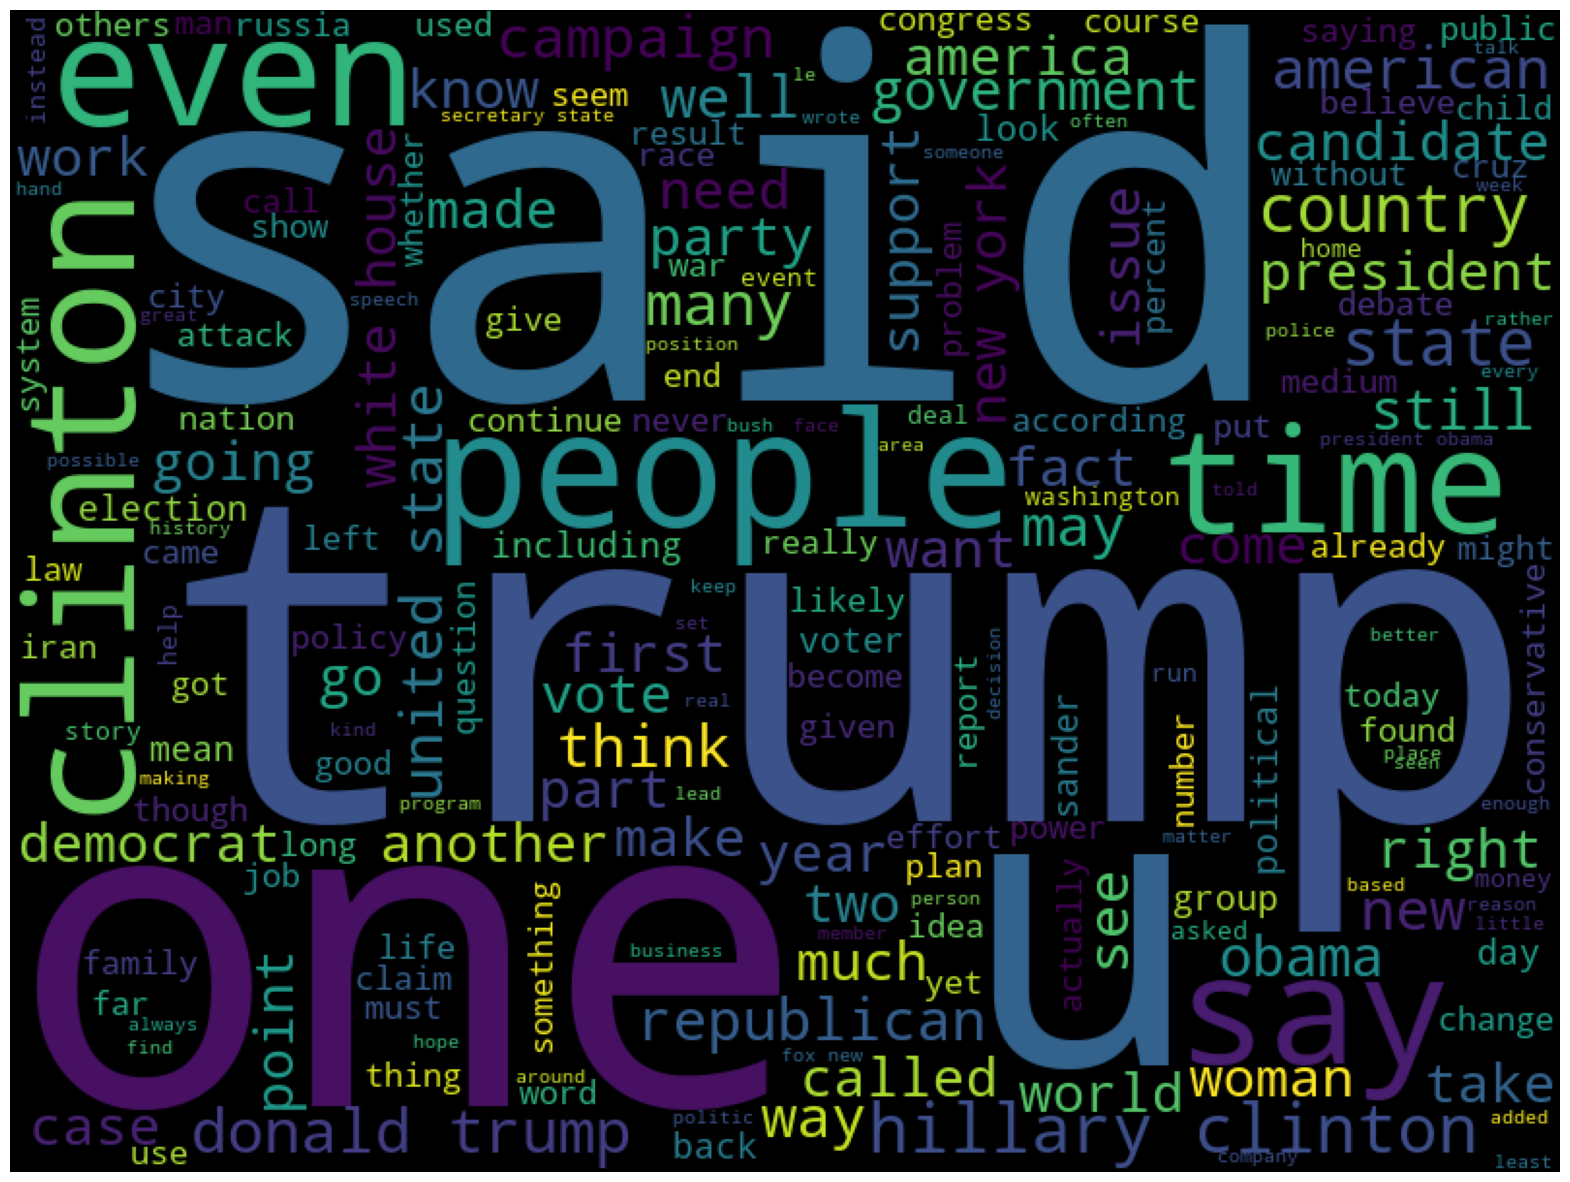

<Figure size 640x480 with 0 Axes>

In [13]:
# Initialize word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# Passing in the text
text_cloud = wordcloud.generate(' '.join(df['text']))
# Plotting the result:
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

#Save plot
plt.savefig('saved_plots/text-cloud.png')

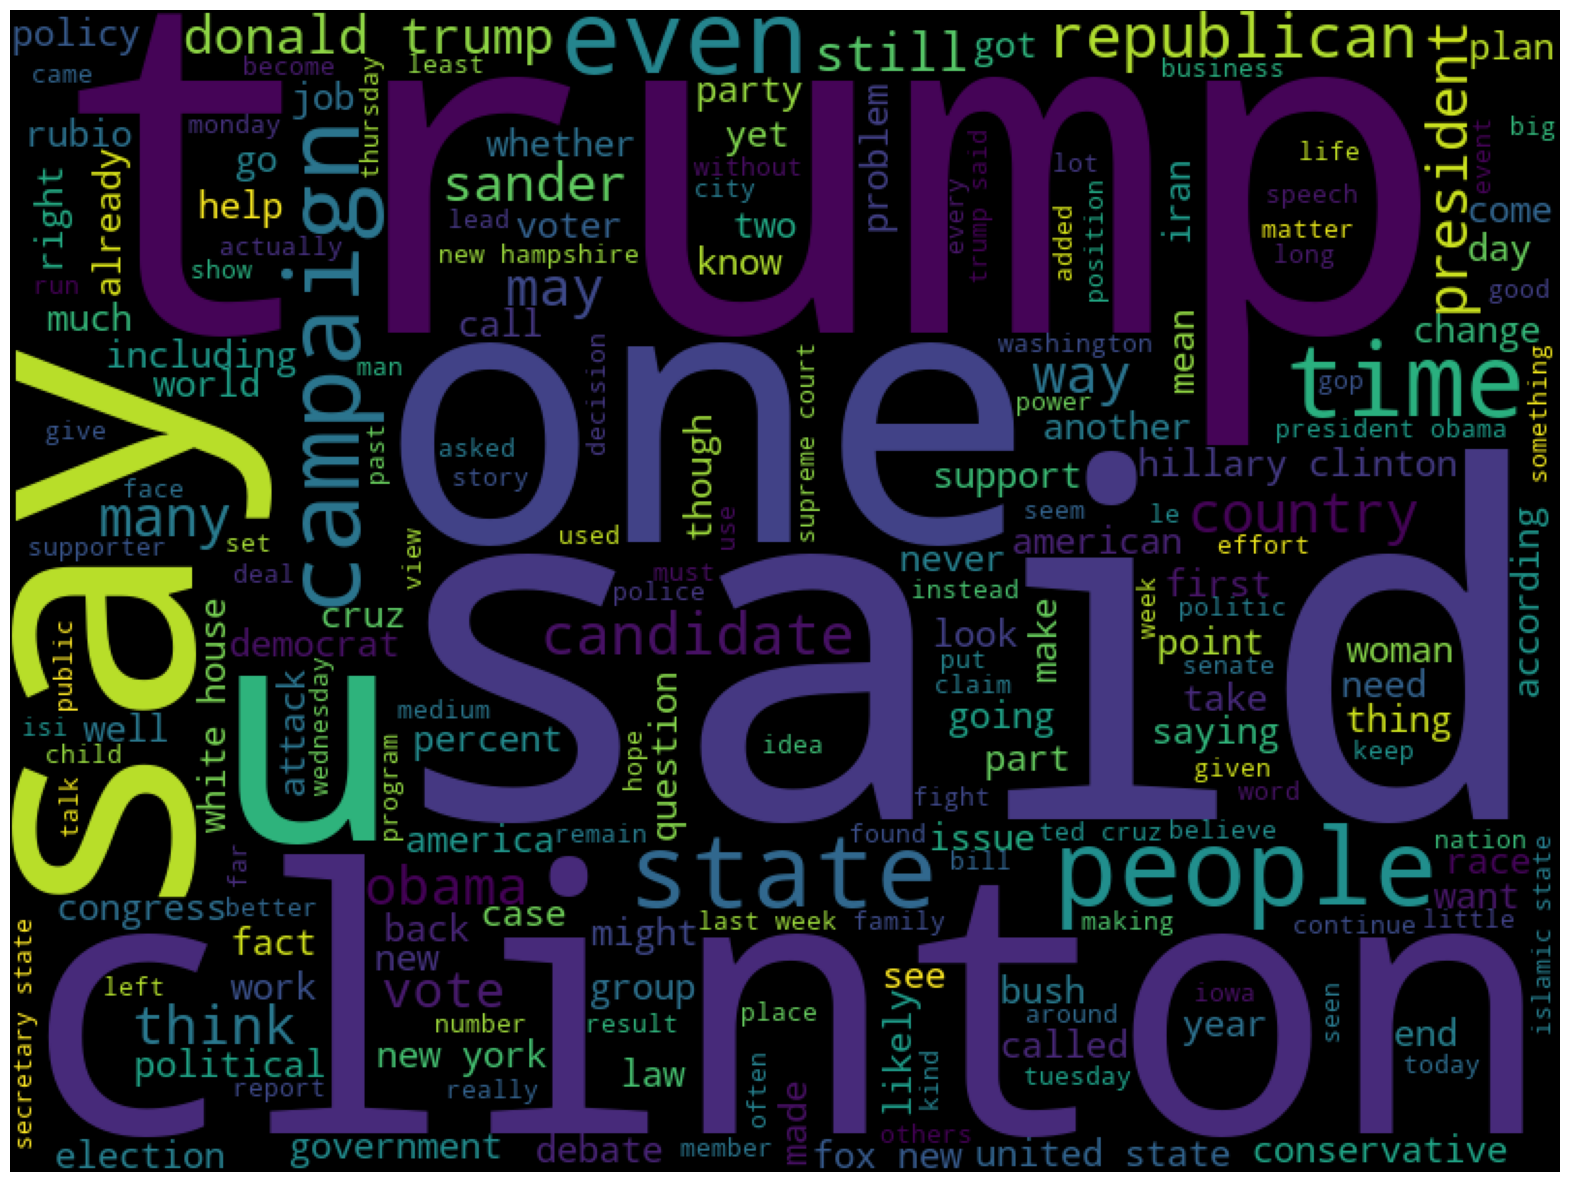

<Figure size 640x480 with 0 Axes>

In [14]:
#For reliable or REAL news only, filter/mask text where label == 0
real_news = ' '.join(df[df['label']==0]['text']) 
text_cloud_real = wordcloud.generate(real_news)
#Plotting the result:
plt.figure(figsize=(20,30))
plt.imshow(text_cloud_real)
plt.axis('off')
plt.show()

#Save plot
plt.savefig('saved_plots/text-cloud-real.png')

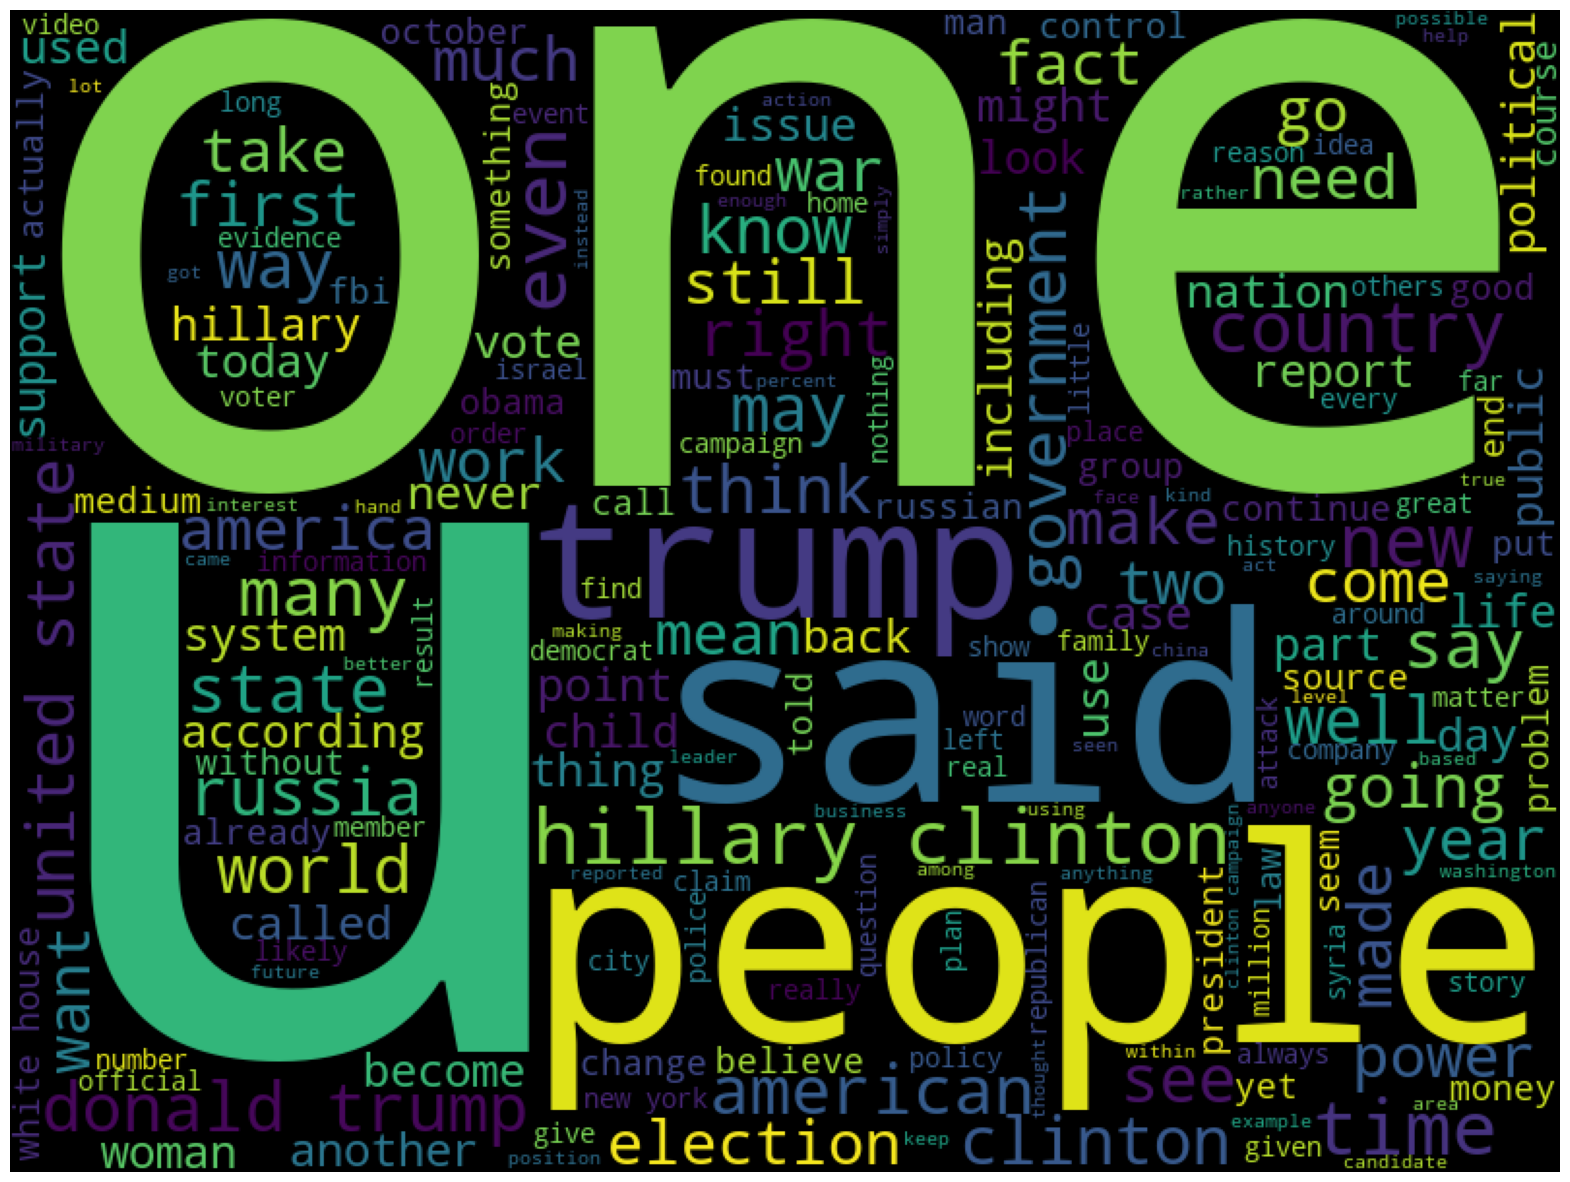

<Figure size 640x480 with 0 Axes>

In [15]:
#For FAKE news only, filter/mask text where label == 1
fake_news = ' '.join(df[df['label']==1]['text']) 
text_cloud_fake = wordcloud.generate(fake_news)
#Plotting the result:
plt.figure(figsize=(20,30))
plt.imshow(text_cloud_fake)
plt.axis('off')
plt.show()

#Save plot
plt.savefig('saved_plots/text-cloud-fake.png')

label
0    3171
1    3164
Name: count, dtype: int64


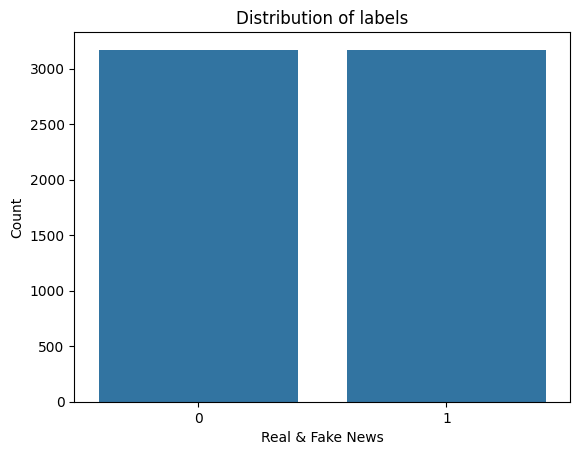

In [16]:
#Plot count of REAL AND FAKE news
sns.countplot(x="label", data=df);
plt.xlabel('Real & Fake News')
plt.ylabel('Count')
plt.title("Distribution of labels")
print(df.label.value_counts());

#Save Figure
plt.savefig('saved_plots/real_&_fake-count_barplot.png')

In [17]:
# Define a function to plot an n-gram
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.savefig(f'saved_plots/{title}.png')
  plt.show()
  

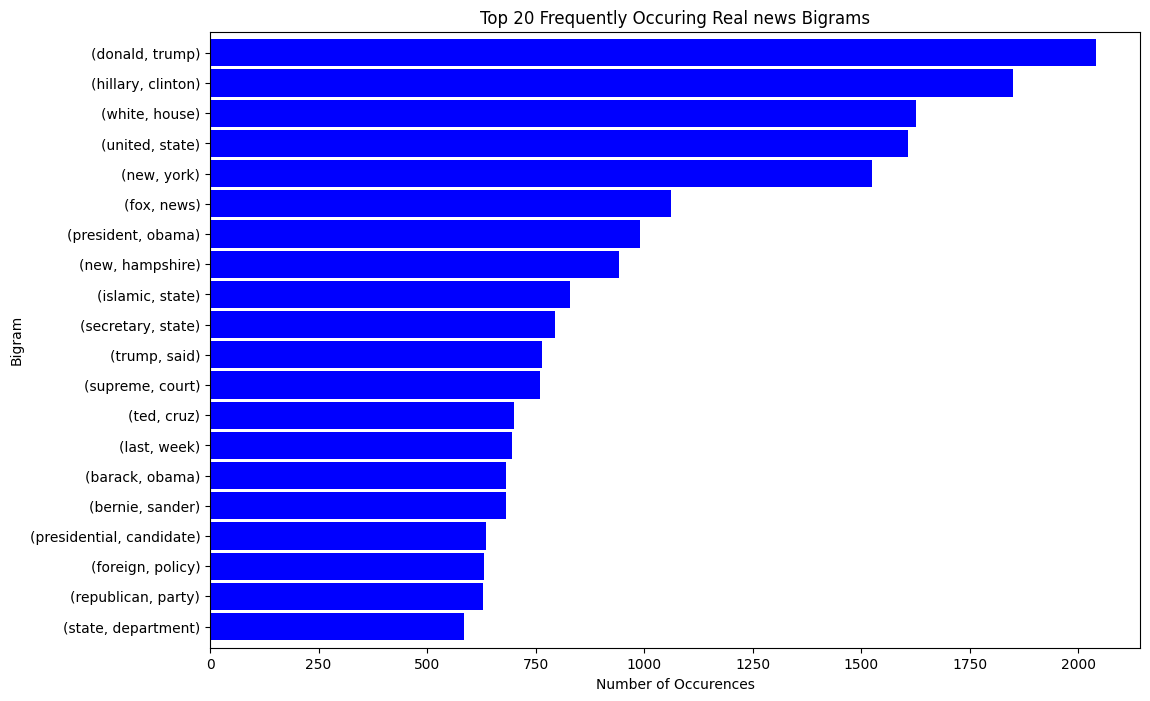

In [18]:
#Plotting the most common bigram on the reliable news:
plot_top_ngrams(real_news, 'Top 20 Frequently Occuring Real news Bigrams', "Bigram", n=2)

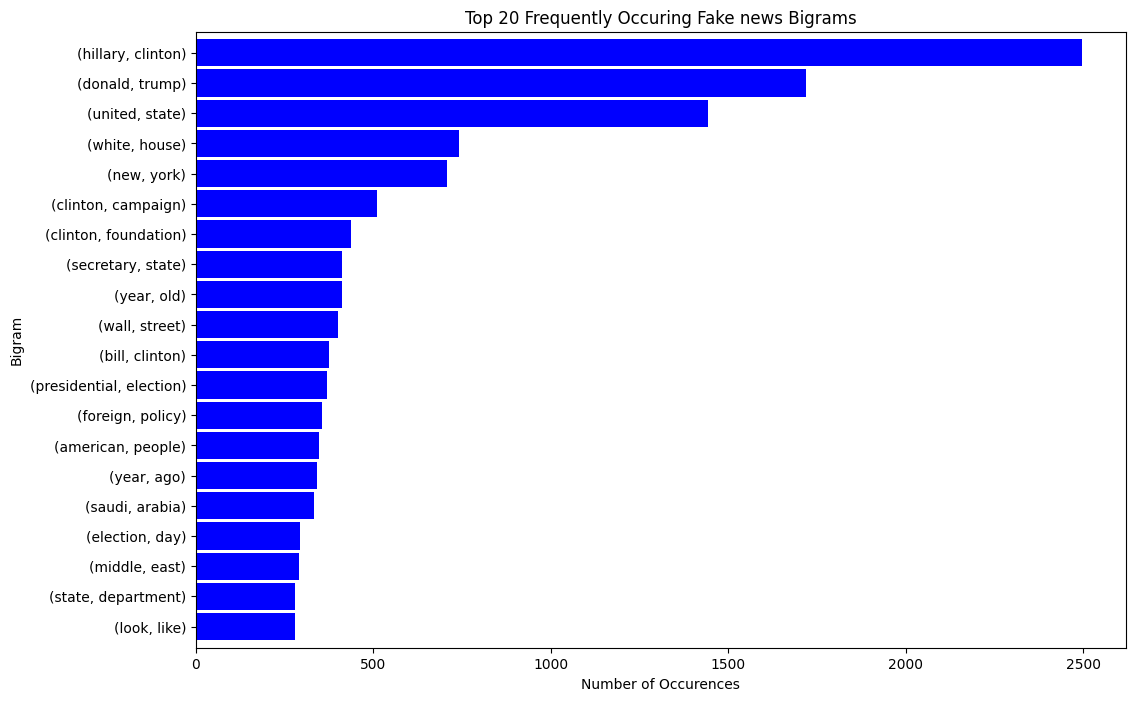

In [19]:
#Plotting the most common bigram on the fake news:
plot_top_ngrams(fake_news, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

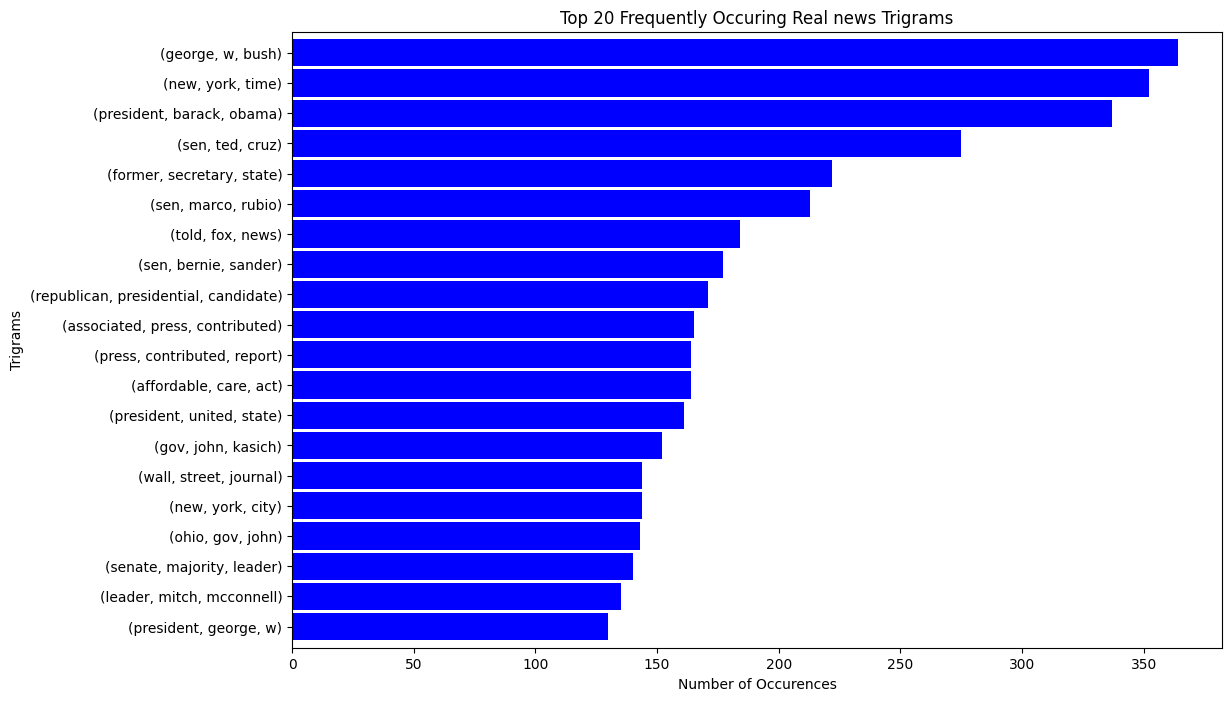

In [20]:
#Plotting the most common three word combination on the reliable news:
plot_top_ngrams(real_news, 'Top 20 Frequently Occuring Real news Trigrams', "Trigrams", n=3)

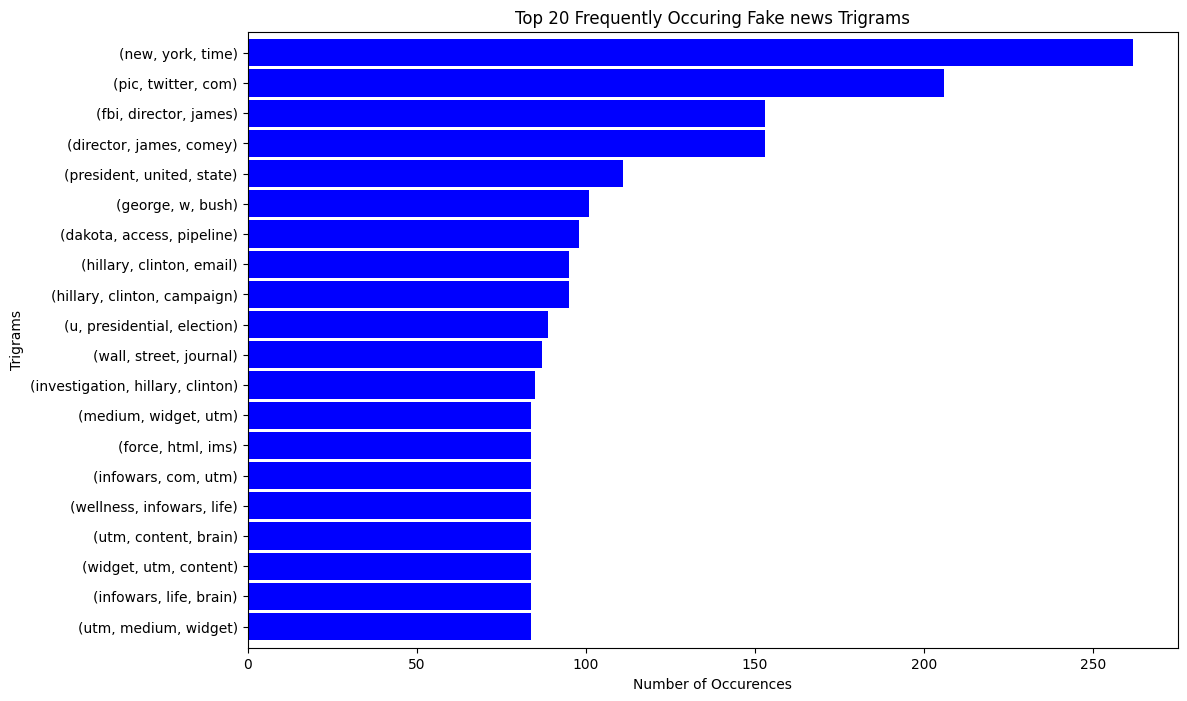

In [21]:
#Plotting the most common trigram on the fake news:
plot_top_ngrams(fake_news, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

This concludes the news analysis